# 25. Нелинейный метод наименьших квадратов

Данные, представленные в таблице, нанесите на график.
```

       x         f(x)    
 ----------------------
    2.5134       0.00   
    2.0443       0.05
    1.6684       0.10
    1.3664       0.15
    1.1232       0.20
    0.9269       0.25
    0.7679       0.30
    0.6389       0.35
    0.5338       0.40
    0.4479       0.45
    0.3776       0.50
    0.3197       0.55
    0.2720       0.60
    0.2325       0.65
    0.1997       0.70
    0.1723       0.75
    0.1493       0.80
    0.1301       0.85
    0.1138       0.90
    0.1000       0.95
    0.0883       1.00
    0.0783       1.05
    0.0698       1.10
    0.0624       1.15
 ```
 
 Нелинейным методом наименьших квадратов аппроксимируйте данные моделью в виде суммы трех экспонент
$$
f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x},
$$
Рассмотрите различные начальные приближения к $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$,$\lambda_3$.
Чему равна результирующая суммарная ошибка?
Насколько чувствительны результирующие значения к начальным значениям?
Как изменится результат, если в модели оставить одну или две экспоненты?
Для одной экспоненты сведите задачу к линейной задаче наименьших квадратов.


Начнем с импорта библиотек и вывода значений.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

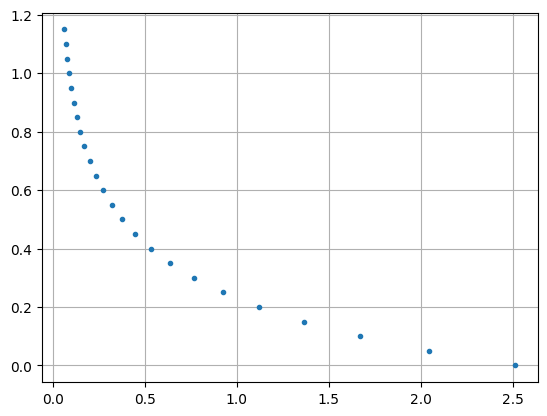

In [2]:
tabl=[(2.5134, 0 ) , ( 2.0443, 0.05 ) , ( 1.6684, 0.10 ) , ( 1.3664, 0.15 ) , (1.1232, 0.20 ) , (0.9269, 0.25 ) , (0.7679, 0.30 ) , (0.6389, 0.35 ) , (0.5338, 0.40 ) , (0.4479, 0.45 ) , (0.3776, 0.50 ) , (0.3197, 0.55) , ( 0.2720, 0.60) , ( 0.2325, 0.65) , ( 0.1997, 0.70) , ( 0.1723, 0.75) , ( 0.1493, 0.80) , ( 0.1301, 0.85) , ( 0.1138, 0.90) , ( 0.1000, 0.95) , ( 0.0883, 1.00) , ( 0.0783, 1.05) , ( 0.0698, 1.10) , (  0.0624, 1.15)]
x = np.array([a[0] for a in tabl])
y = np.array([a[1] for a in tabl])
plt.plot(x,y,'.')
plt.grid()
exp_chang=[]


**Создадим функцию**

In [3]:
def fn(x,b1,b2,b3,a1,a2,a3):
    res = b1*(np.exp(-a1*x))
    res += b2*(np.exp(-a2*x))
    res += b3*(np.exp(-a3*x))
    return res

Будем использовать curve_fit из numpy, он подбирает значения методом наименьших квадратов. Это именно то, что нам нужно.
Результат выводить будем голубым цветом.

Сумма квадратов отклонений:


0.001769731588230062

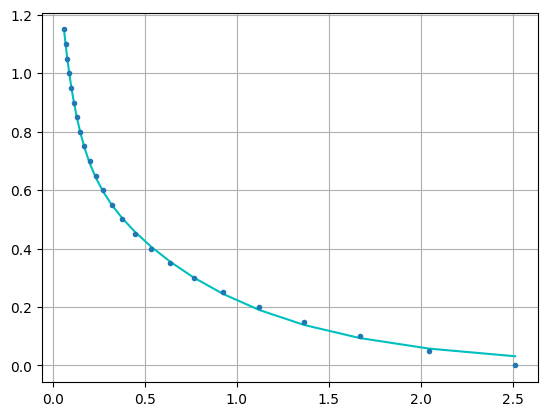

In [4]:
tmp, er = curve_fit(fn, x, y) #по умолчанию все начальные предложенные параметры равны 1
b1, b2, b3, a1, a2, a3 =tmp
yn = fn(x, b1, b2, b3, a1, a2, a3)
plt.plot(x, yn, 'c')
plt.plot(x, y, '.')
plt.grid()
er = np.sum((y - yn)**2)
exp_chang.append((3,er))
print("Сумма квадратов отклонений:")
er

### Понаблюдаем влияние начальных значений на результирующие

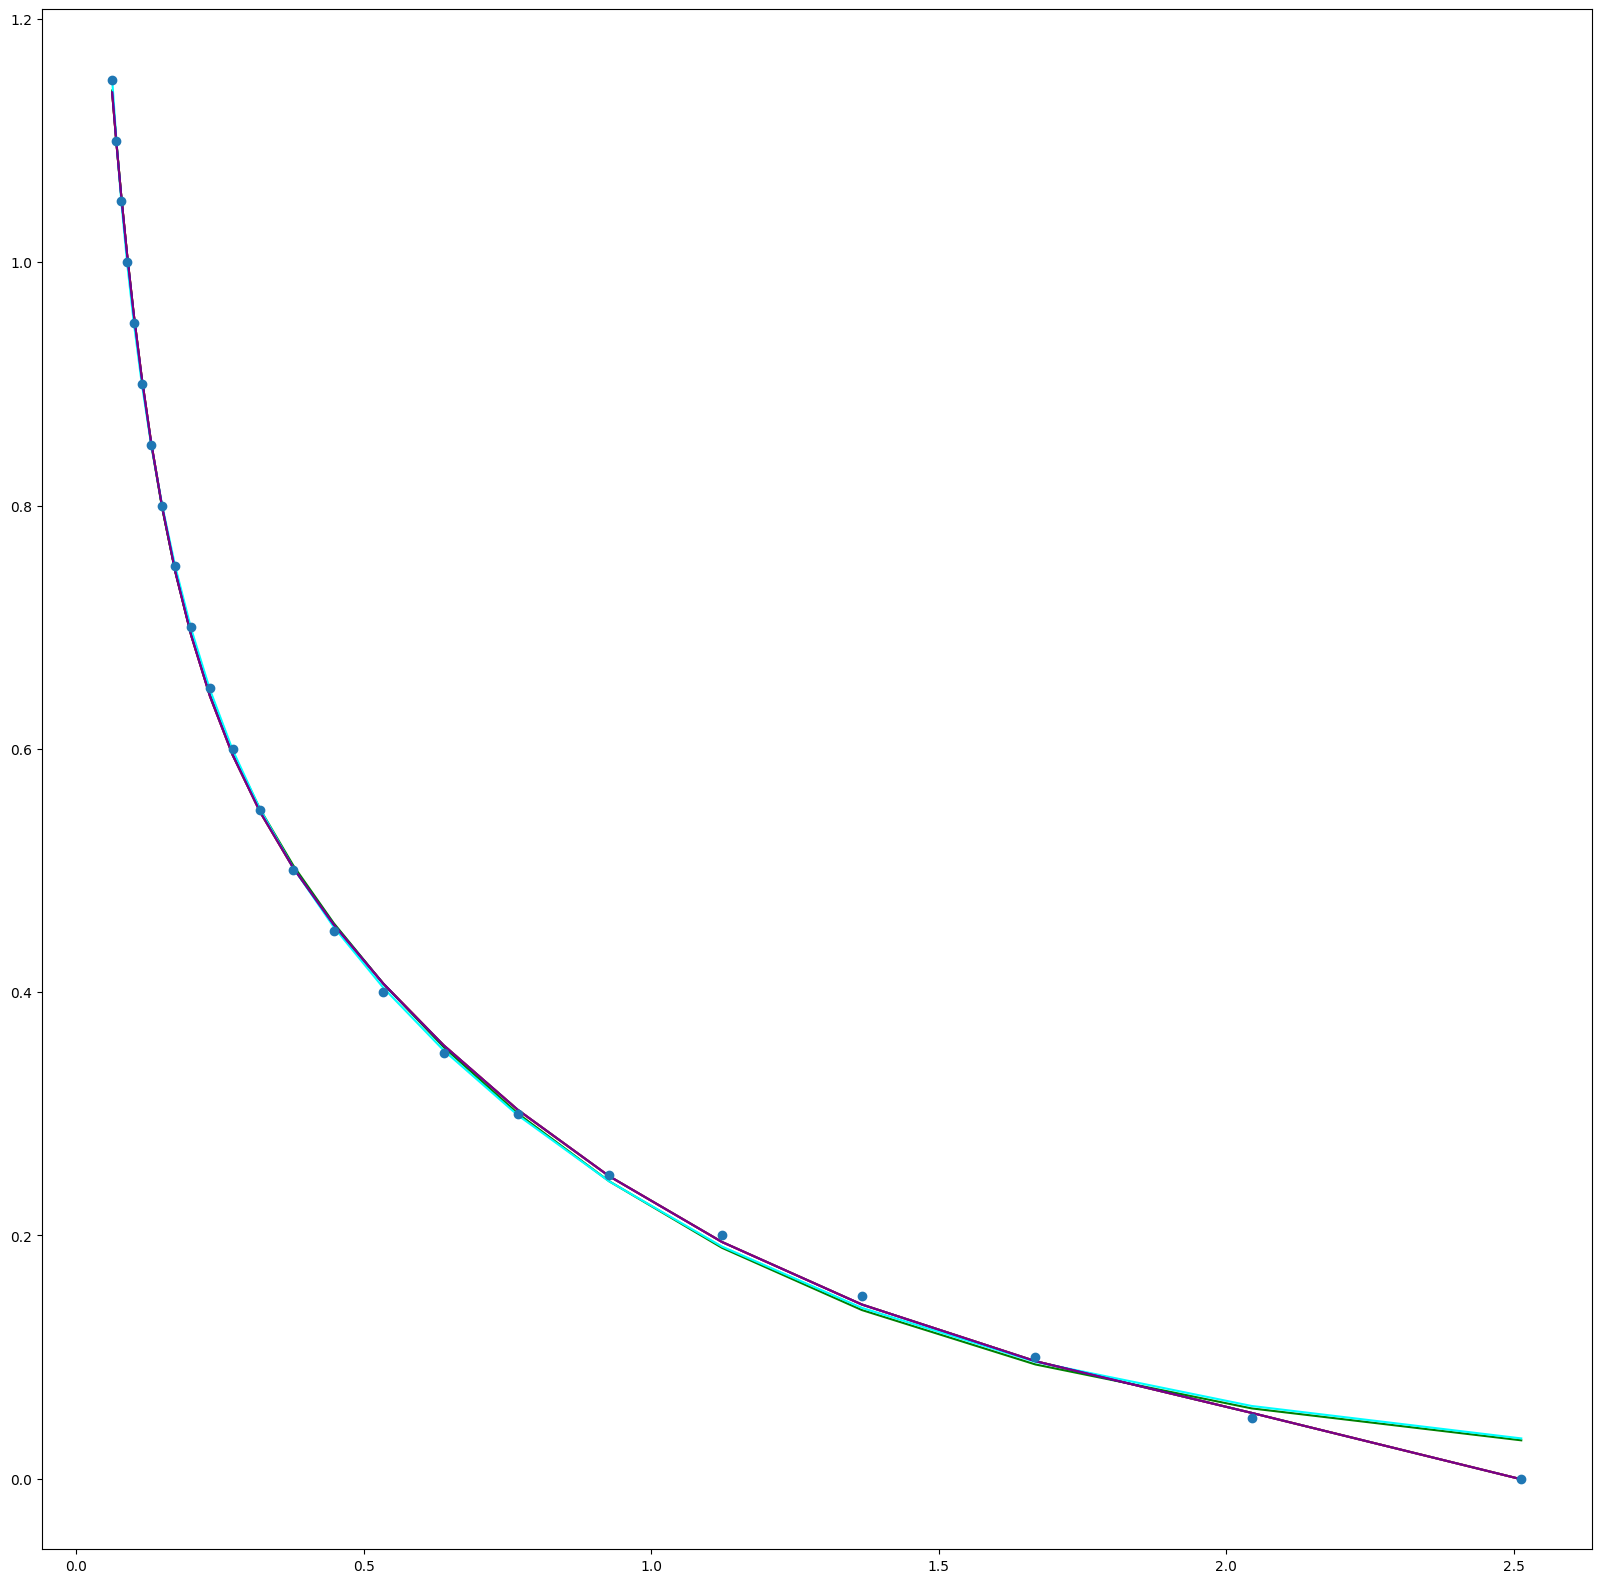

In [5]:
pred=[[1,2,1,1,1,2],[1,2,1,-1,-1,-2], [-1,2,-1,1,-1,2],[10,10,5,10,5,3],[1,2,3,4,5,6],[6,5,4,6,5,4],[9,8,7,6,5,4]]
col=['red','orange','yellow','green','cyan','blue','purple']
errors=[0]*7
plt.figure().set_size_inches(20, 20)

for i in range(len(pred)):
    tmp, er = curve_fit(fn, x, y,pred[i],maxfev=5000) #увеличим количество доступных итераций
    b1, b2, b3, a1, a2, a3 =tmp
    plt.plot(x, fn(x,b1, b2, b3, a1, a2, a3), col[i])
    plt.grid()
    yn = fn(x, b1, b2, b3, a1, a2, a3)
    errors[i] = (np.sum((y - yn)**2), pred[i], col[i])
plt.plot(x, y, 'o')
plt.grid()

На графике видно, что начальные значения относительно слабо влияют на результирующие. Наиболее точный результат показали начальные значения фиолетового графика, но давайте взглянем на суммы квадратов их отклонений.

In [6]:
print("цвет        отклонение            начальные значения\n")
errors.sort()
for i in errors:
    print(str(i[2]).ljust(10),str(i[0]).ljust(25),str(i[1]).ljust(10)) 

цвет        отклонение            начальные значения

blue       0.0006347158373446724     [6, 5, 4, 6, 5, 4]
red        0.0006347158376645487     [1, 2, 1, 1, 1, 2]
purple     0.0006347158378593181     [9, 8, 7, 6, 5, 4]
yellow     0.0006347158379340661     [-1, 2, -1, 1, -1, 2]
orange     0.000634715838102498      [1, 2, 1, -1, -1, -2]
cyan       0.0014559133088858389     [1, 2, 3, 4, 5, 6]
green      0.0017697315747093674     [10, 10, 5, 10, 5, 3]


Как мы видим, на самом деле, самые точные значения дали значения синего графика, а именно:
$$ \beta_1 = 6,  \beta_2 = 5,   \beta_3 = 4$$
$$\alpha_1 = 6,  \alpha_2 = 5,  \alpha_3 = 4$$
Разница между самым наихудшим и наилучшим результатами 0.001135015737364695. 
Иногда, в некоторых прикладных задачах это может быть неудовлетворительным результатом.

### Попробуем уменьшить количество экспонент

#### Две экспоненты

Сумма квадратов отклонений:


0.0017697315712475348

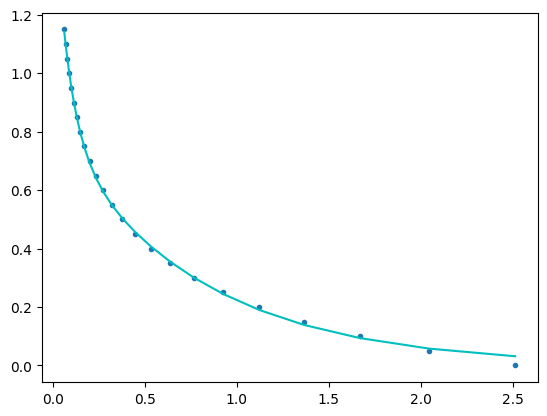

In [7]:
def fn2(x, b1, b2, a1, a2):
    return b1* (np.exp(-a1*x))+b2*(np.exp(-a2*x))

tmp, er = curve_fit(fn2, x, y) #по умолчанию все начальные предложенные параметры равны 1
b1, b2, a1 , a2 = tmp

plt.plot(x, y,'.')
plt.plot(x, fn2(x, b1, b2, a1, a2), 'c')
yn = fn2(x, b1, b2, a1 , a2)
er = np.sum((y - yn) ** 2)
print("Сумма квадратов отклонений:")
exp_chang.append((2,er))
er

##### Одна экспонента
 Линейный метод наименьших квадратов, линейная регрессия.

Сумма квадратов отклонений:


0.0867810249730416

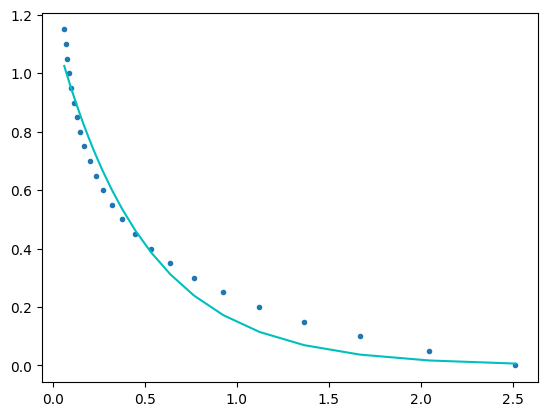

In [8]:
def fn1(x, b1, a1):
    return b1* (np.exp(-a1*x))

tmp, er = curve_fit(fn1, x, y) #по умолчанию все начальные предложенные параметры равны 1
b1, a1 = tmp

plt.plot(x, y,'.')
plt.plot(x, fn1(x, b1, a1), 'c')

yn = fn1(x, b1, a1 )
er = np.sum((y - yn) ** 2)
exp_chang.append((1,er))
print("Сумма квадратов отклонений:")
er

Рассмотрим таблицу отклонений для разного количества экспонент.

In [9]:
print("количество экспонент      сумма отклонений\n")
for i in exp_chang:
    print(" "*10, str(i[0]).ljust(14),i[1])

количество экспонент      сумма отклонений

           3              0.001769731588230062
           2              0.0017697315712475348
           1              0.0867810249730416


Сразу заметны различия между использованием одной экспоненты, двух и трех

Результат значительно зависит от количества экспонент и незначительно зависит от начальных значений.Это значит, что чтоб найти наиболее точный результат, необходимо несколько раз проводить подбор начальных значений.